<a href="https://colab.research.google.com/github/Shrutichauha7/EV-Market/blob/main/Segment_analysis_using_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('/content/Raw data.zip')

In [3]:
# Select relevant features for segmentation
features = ['Electric Range', 'Base MSRP', 'Model Year']
df_selected = df[features]

# Handle missing values by filling with median (for numerical columns)
df_selected.fillna(df_selected.median(), inplace=True)

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

<ipython-input-3-d4a44d6c5e60>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.fillna(df_selected.median(), inplace=True)


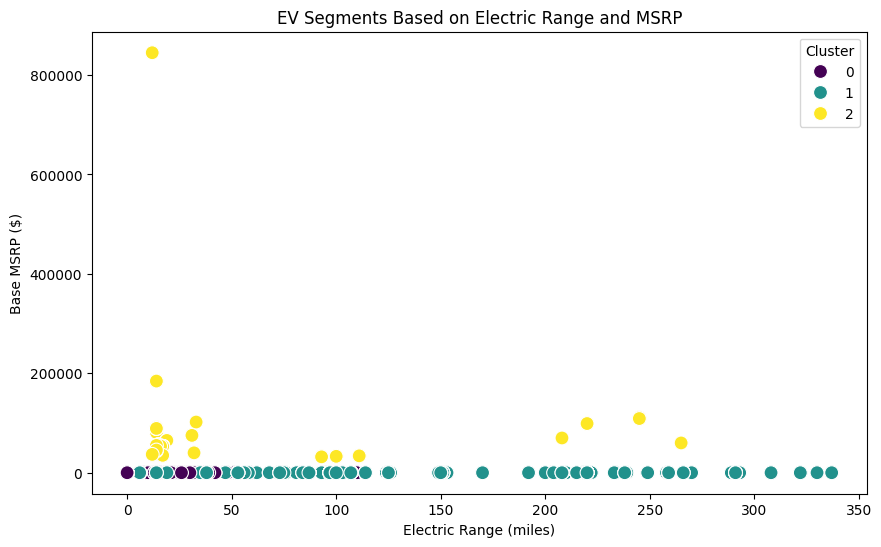

In [4]:
# Apply KMeans clustering with 3 clusters (this can be adjusted)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Electric Range', y='Base MSRP', hue='Cluster', palette='viridis', s=100)
plt.title("EV Segments Based on Electric Range and MSRP")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Base MSRP ($)")
plt.show()

In [5]:
# Calculate the mean of each feature for each cluster
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)

         Electric Range     Base MSRP   Model Year
Cluster                                           
0              6.138452      0.000000  2022.465201
1            160.717744      0.000000  2017.215330
2            121.476932  57042.110545  2015.618634


Interpretation of Segments


 Cluster 0: May represent budget-friendly EVs with lower ranges and MSRPs.

Cluster 1: Could represent high-end EVs with longer ranges and higher prices.

Cluster 2: Might be mid-range EVs.